In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Paths del binario que mide tiempos
medidor = './tiempos'
unidad = 'micros'

# Variables de estadísticos
muestras = 5


# Midiendo tiempos del goloso
Para distintos M,N medir los tiempos de C = 1 ... min(M,N)

In [3]:
NN = range(1,200,20)
MM = range(1,250,20)
# C = min(M,N)


In [ ]:
ai = '-g'

tiempos = np.zeros((len(NN),len(MM))) # 

n = 0
for N in NN:
    m = 0
    for M in MM:
        C = min(N,M)
        P = N*M
        tt = []
        goloso = ai
        for i in range(C+10):
            goloso = goloso + ' -1'
        command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
        command+=' -t '+unidad+' '+goloso
        for k in range(muestras):

            tt.append(float(os.popen(command).read()))
        tiempos[n][m] = np.min(tt)
        m+=1
    print(N)
    n+=1
np.save('save/tiempos_goloso.npy',tiempos)



13


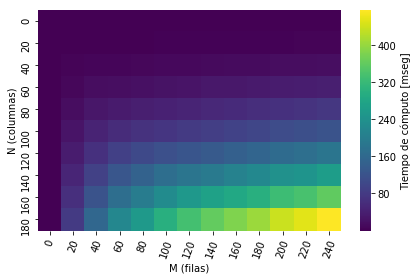

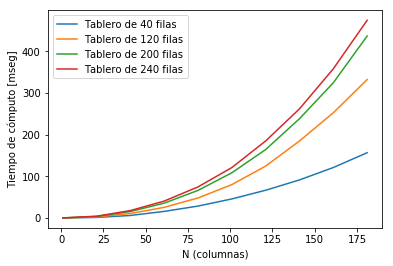

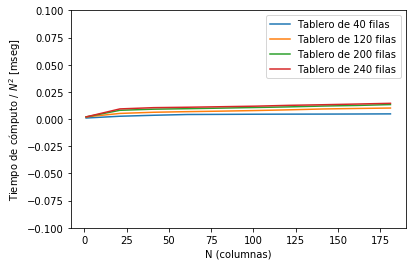

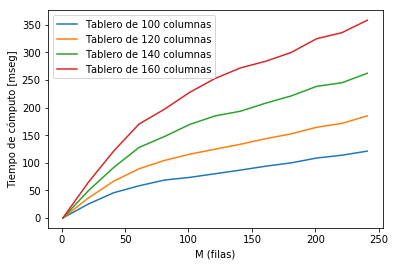

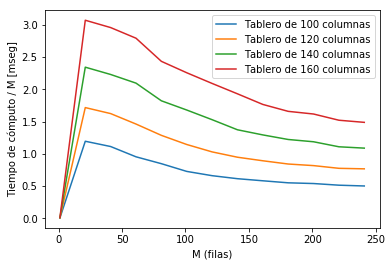

In [19]:
import seaborn as sns

tiempos = np.load('save/tiempos_goloso.npy')
tiempos = tiempos/1000
print(len(tiempos[0]))

# Heatmap
xticks = range(0,250,20)
yticks = range(0,200,20)

sns.heatmap(tiempos,cmap='viridis',xticklabels=xticks,yticklabels=yticks,cbar_kws={'label': 'Tiempo de cómputo [mseg]'})

plt.xticks(rotation=70)
plt.xlabel('M (filas)')
plt.ylabel('N (columnas)')
plt.tight_layout()
plt.savefig('plots/goloso_heatmap.pdf',bbox_inches='tight')
plt.show()


# Curva N
plt.plot(NN,tiempos[:,2],label='Tablero de 40 filas')
plt.plot(NN,tiempos[:,6],label='Tablero de 120 filas')
plt.plot(NN,tiempos[:,10],label='Tablero de 200 filas')
plt.plot(NN,tiempos[:,12],label='Tablero de 240 filas')
plt.legend()
plt.xlabel('N (columnas)')
plt.ylabel('Tiempo de cómputo [mseg]')
plt.savefig('plots/goloso_N.pdf',bbox_inches='tight')
plt.show()


# Curva N cociente
plt.plot(NN,tiempos[:,2]/np.multiply(NN,NN),label='Tablero de 40 filas')
plt.plot(NN,tiempos[:,6]/np.multiply(NN,NN),label='Tablero de 120 filas')
plt.plot(NN,tiempos[:,10]/np.multiply(NN,NN),label='Tablero de 200 filas')
plt.plot(NN,tiempos[:,12]/np.multiply(NN,NN),label='Tablero de 240 filas')
plt.legend()
plt.xlabel('N (columnas)')
plt.ylabel('Tiempo de cómputo / $N^2$ [mseg]')
plt.ylim(ymin=-0.1, ymax=0.1)
plt.savefig('plots/goloso_N_cociente.pdf',bbox_inches='tight')
plt.show()

# Curva M
plt.plot(MM,tiempos[5],label='Tablero de 100 columnas')
plt.plot(MM,tiempos[6],label='Tablero de 120 columnas')
plt.plot(MM,tiempos[7],label='Tablero de 140 columnas')
plt.plot(MM,tiempos[8],label='Tablero de 160 columnas')
plt.legend()
plt.xlabel('M (filas)')
plt.ylabel('Tiempo de cómputo [mseg]')
plt.savefig('plots/goloso_M.pdf',bbox_inches='tight')
plt.show()

# Curva cociente M
plt.plot(MM,tiempos[5]/MM,label='Tablero de 100 columnas')
plt.plot(MM,tiempos[6]/MM,label='Tablero de 120 columnas')
plt.plot(MM,tiempos[7]/MM,label='Tablero de 140 columnas')
plt.plot(MM,tiempos[8]/MM,label='Tablero de 160 columnas')
plt.legend()
plt.xlabel('M (filas)')
plt.ylabel('Tiempo de cómputo / M [mseg]')
plt.savefig('plots/goloso_M_cociente.pdf',bbox_inches='tight')
plt.show()